In [4]:
import numpy as np
import pandas as pd
import arch as arch
from pathlib import Path
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\DanGo\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [6]:
#!pip install arch

In [7]:
# Futures contract on the Yen-dollar exchange rate:
# This is the continuous chain of the futures contracts that are 1 month to expiration
yen_futures = pd.read_csv(
    Path("yen.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1976-08-02,3398.0,3401.0,3398.0,3401.0,NaN,3401.0,2.0,1.0
1976-08-03,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-04,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-05,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-06,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0


In [8]:
# Trim the dataset to begin on January 1st, 1990
yen_futures = yen_futures.loc["1990-01-01":, :]
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1990-01-02,6954.0,6954.0,6835.0,6847.0,NaN,6847.0,48336.0,51473.0
1990-01-03,6877.0,6910.0,6865.0,6887.0,NaN,6887.0,38206.0,53860.0
1990-01-04,6937.0,7030.0,6924.0,7008.0,NaN,7008.0,49649.0,55699.0
1990-01-05,6952.0,6985.0,6942.0,6950.0,NaN,6950.0,29944.0,53111.0
1990-01-08,6936.0,6972.0,6936.0,6959.0,NaN,6959.0,19763.0,52072.0


 # Return Forecasting: Initial Time-Series Plotting

 Start by plotting the "Settle" price. Do you see any patterns, long-term and/or short?

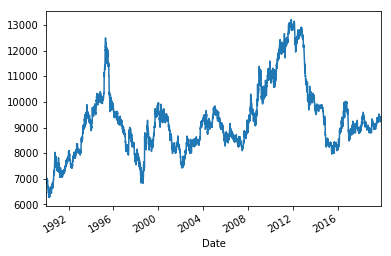

In [9]:
# Plot just the "Settle" column from the dataframe:
# YOUR CODE HERE!
yen_futures.Settle.plot()

---

# Decomposition Using a Hodrick-Prescott Filter

 Using a Hodrick-Prescott Filter, decompose the Settle price into a trend and noise.

In [10]:
import statsmodels.api as sm

# Apply the Hodrick-Prescott Filter by decomposing the "Settle" price into two separate series:
# YOUR CODE HERE!
noise, trend = sm.tsa.filters.hpfilter(yen_futures['Settle'])
noise

Date
1990-01-02   -61.503967
1990-01-03   -21.799756
1990-01-04    98.942896
1990-01-05    40.776052
1990-01-08    49.689938
1990-01-09     5.649296
1990-01-10   -22.412192
1990-01-11   -16.564371
1990-01-12   -36.863081
1990-01-15   -13.353807
1990-01-16   -14.058996
1990-01-17   -14.992749
1990-01-18   -60.160381
1990-01-19   -39.557833
1990-01-22   -74.143449
1990-01-23   -49.850848
1990-01-24   -35.567311
1990-01-25    31.851040
1990-01-26    99.570312
1990-01-29    79.736704
1990-01-30   -14.565816
1990-01-31    15.696885
1990-02-01    -8.431956
1990-02-02   -36.918914
1990-02-05    -0.725292
1990-02-06   -24.789320
1990-02-07   -31.048776
1990-02-08   -17.425941
1990-02-09    15.176305
1990-02-12    42.865978
                ...    
2019-09-04    24.894097
2019-09-05   -19.543935
2019-09-06    -6.581845
2019-09-09   -24.389075
2019-09-10   -42.130954
2019-09-11   -66.957570
2019-09-12   -96.992675
2019-09-13   -92.818177
2019-09-16   -73.455360
2019-09-17   -33.367498
2019-09-18 

In [11]:
# Create a dataframe of just the settle price, and add columns for "noise" and "trend" series from above:
# YOUR CODE HERE!
settle_price=pd.DataFrame(yen_futures['Settle'])
settle_price


,Settle
Date,
1990-01-02,6847.0
1990-01-03,6887.0
1990-01-04,7008.0
1990-01-05,6950.0
1990-01-08,6959.0
1990-01-09,6915.0
1990-01-10,6887.0
1990-01-11,6893.0
1990-01-12,6873.0


In [12]:
settle_price['noise']=noise
settle_price

,Settle,noise
Date,,
1990-01-02,6847.0,-61.503967
1990-01-03,6887.0,-21.799756
1990-01-04,7008.0,98.942896
1990-01-05,6950.0,40.776052
1990-01-08,6959.0,49.689938
1990-01-09,6915.0,5.649296
1990-01-10,6887.0,-22.412192
1990-01-11,6893.0,-16.564371
1990-01-12,6873.0,-36.863081


In [13]:
settle_price['trend']=trend
settle_price

,Settle,noise,trend
Date,,,
1990-01-02,6847.0,-61.503967,6908.503967
1990-01-03,6887.0,-21.799756,6908.799756
1990-01-04,7008.0,98.942896,6909.057104
1990-01-05,6950.0,40.776052,6909.223948
1990-01-08,6959.0,49.689938,6909.310062
1990-01-09,6915.0,5.649296,6909.350704
1990-01-10,6887.0,-22.412192,6909.412192
1990-01-11,6893.0,-16.564371,6909.564371
1990-01-12,6873.0,-36.863081,6909.863081


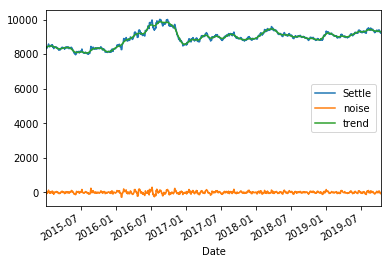

In [14]:
# Plot the Settle Price vs. the Trend for 2015 to the present
# YOUR CODE HERE!
settle_price=settle_price.loc['2015-01-01':]
settle_price.plot()

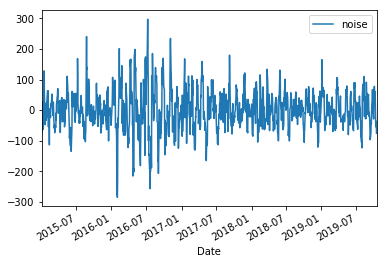

In [15]:
# Plot the Settle Noise
# YOUR CODE HERE!
settle_price.plot(y='noise')

---

# Forecasting Returns using an ARMA Model

Using futures Settle *Returns*, estimate an ARMA model

1. ARMA: Create an ARMA model and fit it to the returns data. Note: Set the AR and MA ("p" and "q") parameters to p=2 and q=1: order=(2, 1).
2. Output the ARMA summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
3. Plot the 5-day forecast of the forecasted returns (the results forecast from ARMA model)

In [16]:
# Create a series using "Settle" price percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
returns = (yen_futures[["Settle"]].pct_change() * 100)
returns = returns.replace(-np.inf, np.nan).dropna()
returns.tail()

,Settle
Date,
2019-10-09,-0.410601
2019-10-10,-0.369458
2019-10-11,-0.564304
2019-10-14,0.151335
2019-10-15,-0.469509


In [17]:
import statsmodels.api as sm

# Estimate and ARMA model using statsmodels (use order=(2, 1))
# YOUR CODE HERE!
from statsmodels.tsa.arima_model import ARMA
model = ARMA(returns.values, order=(2, 1))

# Fit the model and assign it to a variable called results
# YOUR CODE HERE!
result = model.fit()

C:\Users\DanGo\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [18]:
# Output model summary results:
# YOUR CODE HERE!
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 7514
Model:                     ARMA(2, 1)   Log Likelihood               -7894.071
Method:                       css-mle   S.D. of innovations              0.692
Date:                Sun, 18 Jul 2021   AIC                          15798.142
Time:                        14:05:53   BIC                          15832.765
Sample:                             0   HQIC                         15810.030
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0063      0.008      0.804      0.421      -0.009       0.022
ar.L1.y       -0.3064      1.277     -0.240      0.810      -2.810       2.197
ar.L2.y       -0.0019      0.019     -0.099      0.921      -0.040       0.036
ma.L1.y        0.2949      1.277      0.231      0.817      -2.208       2.798
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.3326           +0.0000j            3.3326            0.5000
AR.2         -157.0960           +0.0000j          157.0960            0.5000
MA.1           -3.3914           +0.0000j            3.3914            0.5000
-----------------------------------------------------------------------------
"""

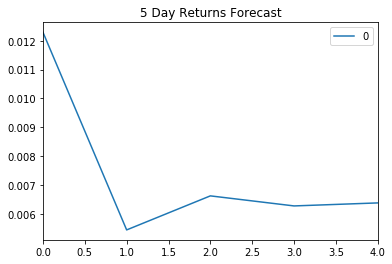

In [19]:
# Plot the 5 Day Returns Forecast
# YOUR CODE HERE!
pd.DataFrame(result.forecast(steps=5)[0]).plot(title="5 Day Returns Forecast")

---

# Forecasting the Settle Price using an ARIMA Model

 1. Using the *raw* Yen **Settle Price**, estimate an ARIMA model.
     1. Set P=5, D=1, and Q=1 in the model (e.g., ARIMA(df, order=(5,1,1))
     2. P= # of Auto-Regressive Lags, D= # of Differences (this is usually =1), Q= # of Moving Average Lags
 2. Output the ARIMA summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
 3. Construct a 5 day forecast for the Settle Price. What does the model forecast will happen to the Japanese Yen in the near term?

In [20]:
from statsmodels.tsa.arima_model import ARIMA

# Estimate and ARIMA Model:
# Hint: ARIMA(df, order=(p, d, q))
# YOUR CODE HERE!
model2 = ARIMA(settle_price.Settle.values, order=(1, 1, 1))
# Fit the model
# YOUR CODE HERE!
results2 = model2.fit()

C:\Users\DanGo\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [21]:
# Output model summary results:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 1205
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6421.098
Method:                       css-mle   S.D. of innovations             49.887
Date:                Sun, 18 Jul 2021   AIC                          12850.196
Time:                        14:06:34   BIC                          12870.573
Sample:                             1   HQIC                         12857.870
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7531      1.421      0.530      0.596      -2.033       3.539
ar.L1.D.y     -0.9271      0.064    -14.419      0.000      -1.053      -0.801
ma.L1.D.y      0.9058      0.072     12.526      0.000       0.764       1.048
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0787           +0.0000j            1.0787            0.5000
MA.1           -1.1040           +0.0000j            1.1040            0.5000
-----------------------------------------------------------------------------
"""

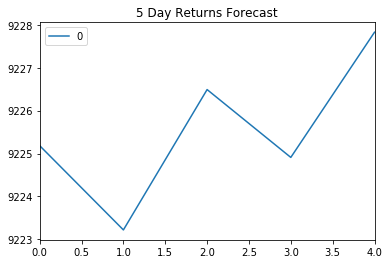

In [22]:
# Plot the 5 Day Price Forecast
# YOUR CODE HERE!
pd.DataFrame(results2.forecast(steps=5)[0]).plot(title="5 Day Returns Forecast")

---

# Volatility Forecasting with GARCH

Rather than predicting returns, let's forecast near-term **volatility** of Japanese Yen futures returns. Being able to accurately predict volatility will be extremely useful if we want to trade in derivatives or quantify our maximum loss.
 
Using futures Settle *Returns*, estimate an GARCH model

1. GARCH: Create an GARCH model and fit it to the returns data. Note: Set the parameters to p=2 and q=1: order=(2, 1).
2. Output the GARCH summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
3. Plot the 5-day forecast of the volatility.

In [23]:
import arch as arch
from arch import arch_model

In [27]:
pd.DataFrame(returns)
returns.tail()

,Settle
Date,
2019-10-09,-0.410601
2019-10-10,-0.369458
2019-10-11,-0.564304
2019-10-14,0.151335
2019-10-15,-0.469509


In [28]:
# Estimate a GARCH model:
# YOUR CODE HERE!
model = arch_model(returns.Settle, mean="Zero", vol="GARCH", p=2, q=2)
# Fit the model
# YOUR CODE HERE!
results = model.fit(disp="off")

In [29]:
# Summarize the model results
# YOUR CODE HERE!
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                 Settle   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7452.15
Distribution:                  Normal   AIC:                           14914.3
Method:            Maximum Likelihood   BIC:                           14948.9
                                        No. Observations:                 7514
Date:                Sun, Jul 18 2021   Df Residuals:                     7514
Time:                        14:25:38   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      6.9822e-03  5.671e-03      1.231      0.218 [-4.133e-03,1.810e-02]
alpha[1]       0.0600  2.959e-02      2.027  4.261e-02    [1.998e-03,  0.118]
alpha[2]   1.5428e-11  6.571e-02  2.348e-10      1.000      [ -0.129,  0.129]
beta[1]        0.3620      0.588      0.616      0.538      [ -0.790,  1.514]
beta[2]        0.5642      0.539      1.046      0.295      [ -0.493,  1.621]
=============================================================================

Covariance estimator: robust
"""

In [30]:
# Find the last day of the dataset
last_day = returns.index.max().strftime('%Y-%m-%d')
last_day

'2019-10-15'

In [31]:
# Create a 5 day forecast of volatility
forecast_horizon = 5
# Start the forecast using the last_day calculated above
# YOUR CODE HERE!
forecasts = results.forecast(start=last_day, horizon=forecast_horizon)

C:\Users\DanGo\anaconda3\envs\pyvizenv\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


In [32]:
# Annualize the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate.head()

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2019-10-15,7.537532,7.474827,7.575985,7.583331,7.642838


In [33]:
# Transpose the forecast so that it is easier to plot
final = intermediate.dropna().T
final.head()

Date,2019-10-15 00:00:00
h.1,7.537532
h.2,7.474827
h.3,7.575985
h.4,7.583331
h.5,7.642838


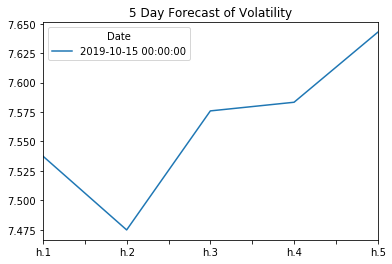

In [35]:
# Plot the final forecast
# YOUR CODE HERE!
final.plot(title="5 Day Forecast of Volatility")

---

# Conclusions

Based on your time series analysis, would you buy the yen now?

Is the risk of the yen expected to increase or decrease?

Based on the model evaluation, would you feel confident in using these models for trading?

If I were basing my investing off of the data provided by the time series analysis above, I would not buy the yen. The ARMA model forecasts a drop, while the ARIMA model forecasts a rise. The GARCH model shows a rise in violatility, or risk. 
None of these models seems to have low AIC or BIC numbers, so I would not be very confident using them to tradr actual real world assets.

